In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -3.7 < rapidity < -3.4

Y_OS = [7910.0, 7782.0, 7683.0, 7425.0, 7241.0, 7059.0, 6853.0, 6691.0, 6389.0, 6221.0, 6174.0, 5994.0, 5829.0, 5630.0, 5635.0, 5300.0, 5230.0, 5081.0, 4853.0, 4922.0, 4808.0, 4569.0, 4392.0, 4208.0, 4262.0, 4178.0, 3964.0, 3806.0, 3690.0, 3746.0, 3592.0, 3468.0, 3317.0, 3197.0, 3287.0, 3096.0, 3069.0, 2881.0, 2825.0, 2764.0, 2616.0, 2614.0, 2463.0, 2481.0, 2429.0, 2283.0, 2351.0, 2273.0, 2245.0, 2060.0, 2161.0, 2017.0, 2004.0, 1805.0, 1900.0, 1864.0, 1899.0, 1807.0, 1796.0, 1661.0, 1735.0, 1641.0, 1653.0, 1601.0, 1651.0, 1652.0, 1735.0, 1722.0, 1674.0, 1930.0, 2163.0, 2333.0, 2545.0, 3018.0, 3317.0, 4242.0, 4703.0, 5511.0, 5949.0, 6025.0, 6028.0, 5474.0, 4688.0, 3989.0, 2880.0, 2281.0, 1680.0, 1474.0, 1142.0, 953.0, 884.0, 844.0, 759.0, 731.0, 679.0, 654.0, 615.0, 617.0, 636.0, 594.0, 565.0, 622.0, 584.0, 502.0, 571.0, 589.0, 561.0, 572.0, 568.0, 495.0, 506.0, 446.0, 497.0, 450.0, 412.0, 385.0, 379.0, 349.0, 360.0, 370.0, 387.0, 333.0, 324.0, 305.0, 315.0, 309.0, 278.0, 321.0, 292.0, 267.0, 244.0, 266.0, 246.0, 278.0, 254.0, 256.0, 232.0, 259.0, 251.0, 246.0, 251.0, 241.0, 206.0, 212.0, 203.0, 206.0, 209.0, 185.0, 211.0, 173.0, 197.0, 172.0, 160.0, 177.0, 169.0, 164.0, 150.0, 165.0, 159.0, 170.0, 145.0, 158.0, 141.0, 129.0, 153.0, 169.0, 139.0, 126.0, 142.0, 134.0, 140.0, 147.0, 137.0, 122.0, 124.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [1405.0, 1331.0, 1326.0, 1348.0, 1285.0, 1376.0, 1313.0, 1302.0, 1236.0, 1184.0, 1154.0, 1152.0, 1105.0, 1086.0, 1062.0, 1046.0, 1047.0, 988.0, 1028.0, 958.0, 874.0, 976.0, 873.0, 921.0, 869.0, 874.0, 812.0, 822.0, 786.0, 764.0, 760.0, 774.0, 741.0, 718.0, 700.0, 656.0, 687.0, 658.0, 650.0, 595.0, 620.0, 618.0, 589.0, 554.0, 583.0, 578.0, 532.0, 544.0, 553.0, 592.0, 522.0, 523.0, 488.0, 485.0, 467.0, 454.0, 464.0, 465.0, 450.0, 427.0, 424.0, 456.0, 430.0, 392.0, 414.0, 381.0, 349.0, 343.0, 352.0, 358.0, 388.0, 338.0, 350.0, 313.0, 305.0, 308.0, 293.0, 296.0, 301.0, 298.0, 274.0, 283.0, 267.0, 278.0, 235.0, 246.0, 269.0, 275.0, 240.0, 241.0, 250.0, 244.0, 249.0, 204.0, 218.0, 215.0, 214.0, 229.0, 189.0, 225.0, 197.0, 190.0, 167.0, 180.0, 189.0, 142.0, 175.0, 167.0, 165.0, 152.0, 165.0, 165.0, 145.0, 150.0, 141.0, 147.0, 147.0, 137.0, 127.0, 158.0, 128.0, 160.0, 130.0, 116.0, 112.0, 126.0, 141.0, 138.0, 113.0, 107.0, 124.0, 112.0, 110.0, 109.0, 115.0, 85.0, 84.0, 109.0, 98.0, 90.0, 100.0, 79.0, 106.0, 97.0, 98.0, 82.0, 76.0, 82.0, 76.0, 84.0, 73.0, 63.0, 79.0, 70.0, 91.0, 97.0, 74.0, 65.0, 64.0, 59.0, 71.0, 67.0, 69.0, 76.0, 55.0, 52.0, 58.0, 69.0, 63.0, 52.0, 60.0, 67.0, 62.0, 42.0, 58.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [9.0, 15.0, 15.0, 8.0, 23.0, 11.0, 22.0, 23.0, 16.0, 28.0, 24.0, 16.0, 20.0, 27.0, 22.0, 29.0, 28.0, 32.0, 28.0, 30.0, 33.0, 23.0, 37.0, 24.0, 41.0, 37.0, 33.0, 49.0, 39.0, 44.0, 59.0, 48.0, 64.0, 52.0, 54.0, 63.0, 79.0, 57.0, 82.0, 96.0, 78.0, 76.0, 100.0, 96.0, 101.0, 104.0, 126.0, 115.0, 147.0, 156.0, 161.0, 167.0, 190.0, 203.0, 217.0, 279.0, 293.0, 321.0, 396.0, 411.0, 491.0, 527.0, 603.0, 750.0, 826.0, 904.0, 1135.0, 1363.0, 1544.0, 1920.0, 2330.0, 2778.0, 3621.0, 4646.0, 6222.0, 8045.0, 10385.0, 12962.0, 15469.0, 17057.0, 17310.0, 15667.0, 12847.0, 9372.0, 6147.0, 3719.0, 2280.0, 1354.0, 751.0, 512.0, 361.0, 259.0, 210.0, 174.0, 107.0, 84.0, 68.0, 60.0, 43.0, 51.0, 43.0, 36.0, 36.0, 15.0, 20.0, 22.0, 17.0, 18.0, 10.0, 17.0, 16.0, 14.0, 10.0, 10.0, 14.0, 7.0, 8.0, 4.0, 4.0, 7.0, 2.0, 3.0, 8.0, 6.0, 4.0, 7.0, 7.0, 1.0, 3.0, 5.0, 4.0, 3.0, 2.0, 1.0, 2.0, 2.0, 4.0, 1.0, 1.0, 1.0, 3.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 3.0, 2.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 1.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [6.0, 2.0, 0.0, 7.0, 7.0, 4.0, 6.0, 7.0, 3.0, 3.0, 3.0, 3.0, 10.0, 6.0, 5.0, 8.0, 9.0, 11.0, 4.0, 10.0, 10.0, 2.0, 4.0, 8.0, 15.0, 8.0, 12.0, 11.0, 9.0, 14.0, 13.0, 13.0, 15.0, 14.0, 10.0, 14.0, 18.0, 20.0, 9.0, 19.0, 24.0, 15.0, 19.0, 21.0, 22.0, 18.0, 21.0, 24.0, 22.0, 20.0, 23.0, 29.0, 28.0, 22.0, 26.0, 29.0, 30.0, 31.0, 20.0, 34.0, 41.0, 36.0, 32.0, 39.0, 47.0, 38.0, 38.0, 32.0, 47.0, 67.0, 59.0, 64.0, 59.0, 63.0, 61.0, 79.0, 75.0, 82.0, 103.0, 107.0, 92.0, 122.0, 134.0, 119.0, 161.0, 170.0, 204.0, 204.0, 243.0, 250.0, 288.0, 358.0, 421.0, 457.0, 521.0, 526.0, 678.0, 801.0, 907.0, 1041.0, 1306.0, 1721.0, 2092.0, 2704.0, 3654.0, 4614.0, 5818.0, 7171.0, 7888.0, 8523.0, 8325.0, 7164.0, 5889.0, 4008.0, 2607.0, 1560.0, 1001.0, 607.0, 403.0, 235.0, 196.0, 127.0, 73.0, 74.0, 56.0, 42.0, 51.0, 25.0, 34.0, 18.0, 22.0, 11.0, 14.0, 13.0, 11.0, 10.0, 12.0, 6.0, 9.0, 3.0, 6.0, 7.0, 8.0, 2.0, 2.0, 3.0, 5.0, 3.0, 5.0, 5.0, 4.0, 5.0, 2.0, 1.0, 3.0, 5.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 4.0, 0.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [15.0, 17.0, 15.0, 15.0, 30.0, 15.0, 28.0, 30.0, 19.0, 31.0, 27.0, 19.0, 30.0, 33.0, 27.0, 37.0, 37.0, 43.0, 32.0, 40.0, 43.0, 25.0, 41.0, 32.0, 56.0, 45.0, 45.0, 60.0, 48.0, 58.0, 72.0, 61.0, 79.0, 66.0, 64.0, 77.0, 97.0, 77.0, 91.0, 115.0, 102.0, 91.0, 119.0, 117.0, 123.0, 122.0, 147.0, 139.0, 169.0, 176.0, 184.0, 196.0, 218.0, 225.0, 243.0, 308.0, 323.0, 352.0, 416.0, 445.0, 532.0, 563.0, 635.0, 789.0, 873.0, 942.0, 1173.0, 1395.0, 1591.0, 1987.0, 2389.0, 2842.0, 3680.0, 4709.0, 6283.0, 8124.0, 10460.0, 13044.0, 15572.0, 17164.0, 17402.0, 15789.0, 12981.0, 9491.0, 6308.0, 3889.0, 2484.0, 1558.0, 994.0, 762.0, 649.0, 617.0, 631.0, 631.0, 628.0, 610.0, 746.0, 861.0, 950.0, 1092.0, 1349.0, 1757.0, 2128.0, 2719.0, 3674.0, 4636.0, 5835.0, 7189.0, 7898.0, 8540.0, 8341.0, 7178.0, 5899.0, 4018.0, 2621.0, 1567.0, 1009.0, 611.0, 407.0, 242.0, 198.0, 130.0, 81.0, 80.0, 60.0, 49.0, 58.0, 26.0, 37.0, 23.0, 26.0, 14.0, 16.0, 14.0, 13.0, 12.0, 16.0, 7.0, 10.0, 4.0, 9.0, 8.0, 8.0, 3.0, 3.0, 5.0, 6.0, 4.0, 5.0, 5.0, 5.0, 5.0, 2.0, 1.0, 3.0, 6.0, 2.0, 4.0, 5.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 1.0, 2.0, 0.0, 0.0, 0.0, 3.0, 5.0, 4.0, 1.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 258442.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

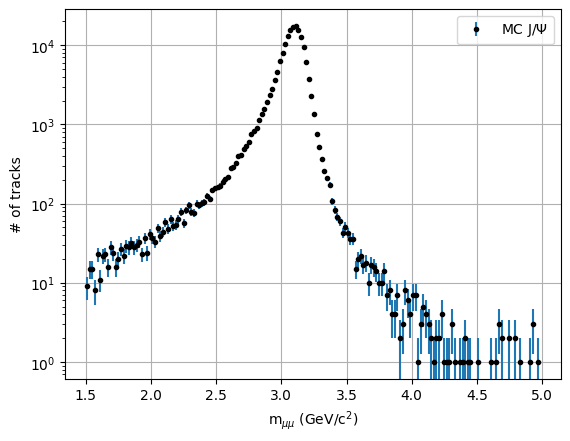

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [17372.927978323518, 3.0967197572194354, 0.06576142716096778, 1.040371464574628, 3.1945616501684277, 2.0484876329118245, 2.914595959843434]
pcov: 
 [[ 8.56045255e+03  8.61847894e-03 -2.22418362e-02 -1.49198456e-01
   2.71723014e-02 -5.39858799e-01  1.18194856e+00]
 [ 8.61847894e-03  1.50955383e-07 -7.80788061e-08 -2.84816638e-06
   8.91750999e-06 -7.23336780e-07 -3.88151992e-07]
 [-2.22418362e-02 -7.80788061e-08  1.40637585e-07  2.81222981e-06
  -6.37055270e-06  4.60782547e-06 -9.45076833e-06]
 [-1.49198456e-01 -2.84816638e-06  2.81222981e-06  1.64636053e-04
  -6.97199844e-04  8.30907854e-05 -1.47536269e-04]
 [ 2.71723014e-02  8.91750999e-06 -6.37055270e-06 -6.97199844e-04
   4.22459927e-03 -1.57764257e-04  2.28401147e-04]
 [-5.39858799e-01 -7.23336780e-07  4.60782547e-06  8.30907854e-05
  -1.57764257e-04  9.36344608e-04 -3.36527757e-03]
 [ 1.18194856e+00 -3.88151992e-07 -9.45076833e-06 -1.47536269e-04
   2.28401147e-04 -3.36527757e-03  1.68675921e-02]]
residual: 
 {'nfev': 8, 

fit error : 92.52283361719306


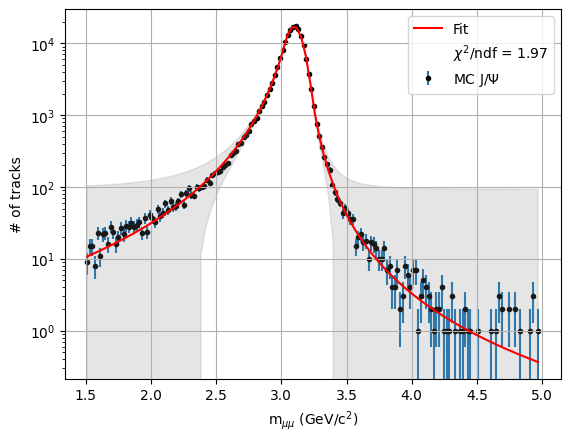

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

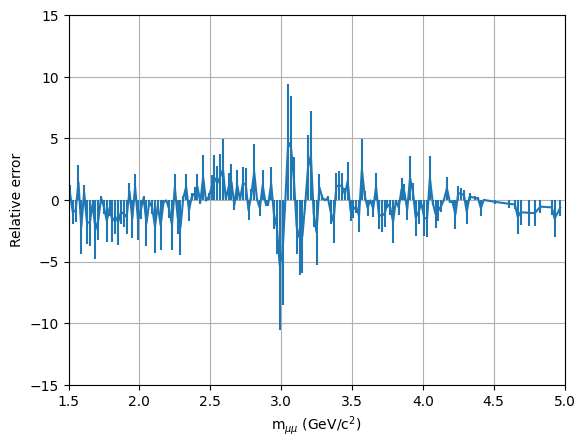

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

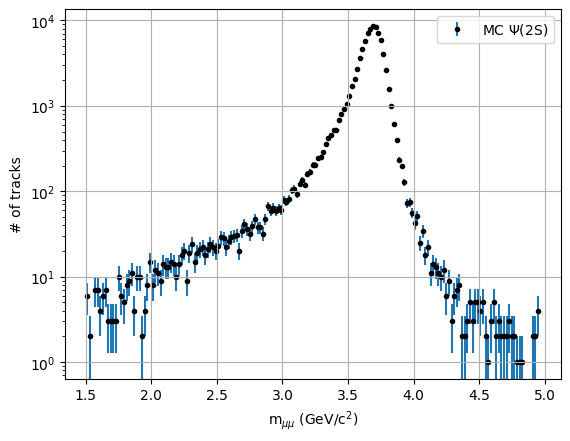

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [8544.46694261311, 3.687336761705106, 0.06801381171270579, 1.0554931378384915, 2.823364823250039, 2.0126732143234545, 3.1065066316161536]
pcov: 
 [[ 3.59468346e+03  7.58160036e-03 -2.03179330e-02 -1.31069089e-01
   5.90531532e-02 -5.51259971e-01  1.46816956e+00]
 [ 7.58160036e-03  2.78891568e-07 -1.45591958e-07 -4.85662503e-06
   1.15590015e-05 -1.28134144e-06 -1.21846427e-06]
 [-2.03179330e-02 -1.45591958e-07  2.74299776e-07  5.02390943e-06
  -8.67991669e-06  9.83299120e-06 -2.50751495e-05]
 [-1.31069089e-01 -4.85662503e-06  5.02390943e-06  2.59415564e-04
  -8.15434425e-04  1.61565963e-04 -3.64176972e-04]
 [ 5.90531532e-02  1.15590015e-05 -8.67991669e-06 -8.15434425e-04
   3.71851682e-03 -2.31024588e-04  4.36511656e-04]
 [-5.51259971e-01 -1.28134144e-06  9.83299120e-06  1.61565963e-04
  -2.31024588e-04  1.87287807e-03 -7.91630576e-03]
 [ 1.46816956e+00 -1.21846427e-06 -2.50751495e-05 -3.64176972e-04
   4.36511656e-04 -7.91630576e-03  4.48949679e-02]]
residual: 
 {'nfev': 9, 'f

fit error : 59.9561022902957


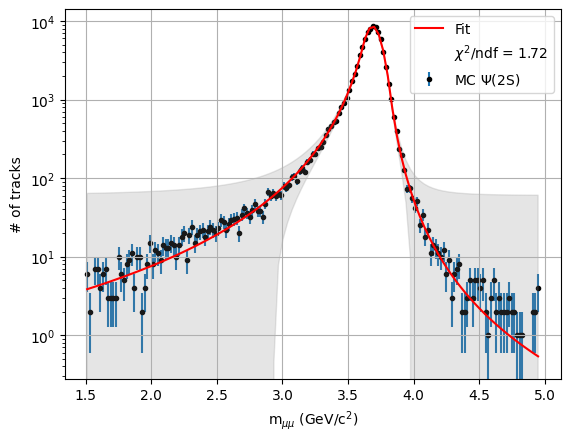

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

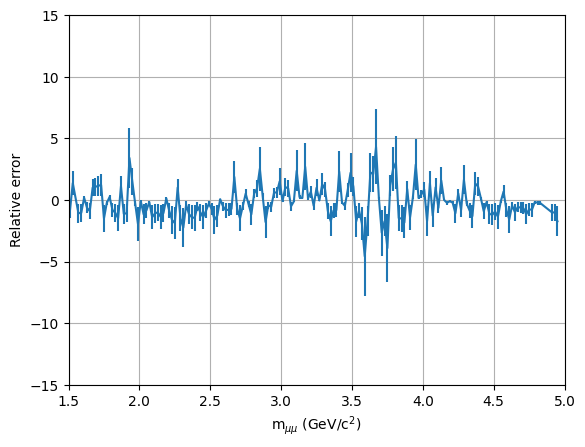

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

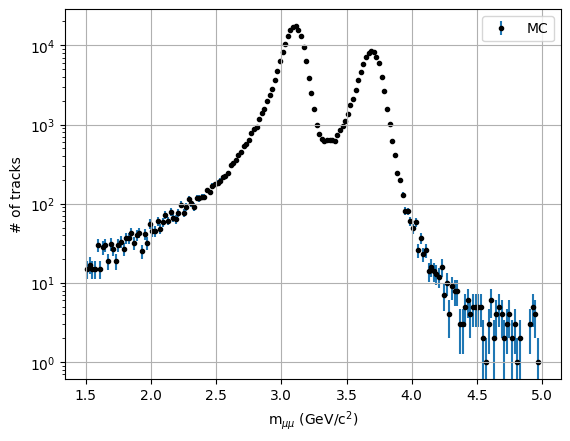

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [17352.136090500302, 3.0966392189593646, 0.06585226232874418, 8538.647396922526, 3.6872826443920763, 0.06816911190609842]
pcov: 
 [[ 1.00964850e+04  6.24772336e-03 -2.07705534e-02 -3.67491045e+01
  -7.13298545e-04  9.93566164e-04]
 [ 6.24772336e-03  1.18671170e-07 -2.30443673e-08  5.44191198e-05
   1.83112961e-09 -1.83035107e-09]
 [-2.07705534e-02 -2.30443673e-08  8.29387652e-08  5.10664917e-04
   7.86304325e-09 -1.19176440e-08]
 [-3.67491045e+01  5.44191198e-05  5.10664917e-04  4.80308302e+03
   7.48279048e-03 -2.14712732e-02]
 [-7.13298545e-04  1.83112961e-09  7.86304325e-09  7.48279048e-03
   2.59126385e-07 -7.05689756e-08]
 [ 9.93566164e-04 -1.83035107e-09 -1.19176440e-08 -2.14712732e-02
  -7.05689756e-08  1.88878402e-07]]
residual: 
 {'nfev': 4, 'fvec': array([-0.08109243, -0.43784368,  0.1878835 ,  0.33210368, -2.39683657,
        0.64204315, -1.86488344, -2.04301003,  0.11993034, -1.92669423,
       -1.14276699,  0.66383638, -1.31996212, -1.61976464, -0.44808847,
       

fit error : 122.06378681560076


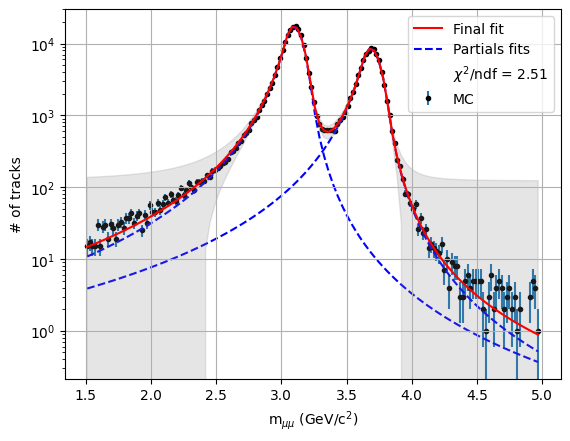

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_14695/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


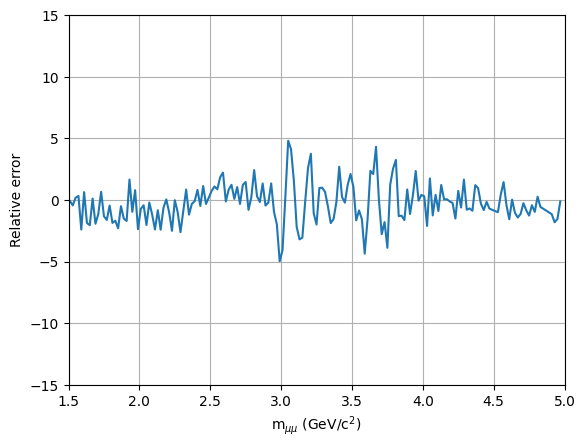

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

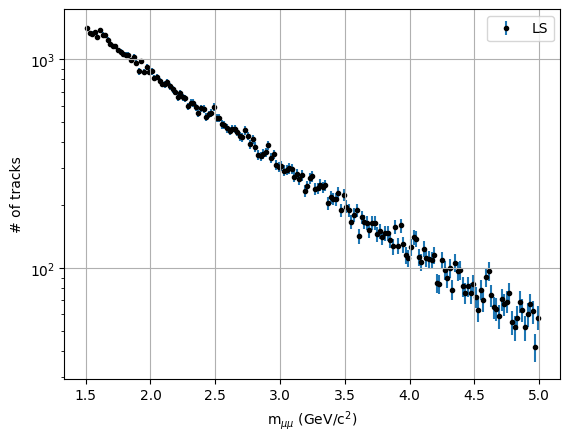

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [7.275677293149912, 6.2519920198731915, 5.326374502468861, 4.996104140976451, 3.977917684363036]
pcov: 
 [[ 1.19983345e-04 -2.26340465e-05  2.86929984e-05  7.53787375e-06
   6.33849022e-05]
 [-2.26340465e-05  3.71501221e-05  1.13862968e-05 -3.13587235e-06
   2.32826901e-05]
 [ 2.86929984e-05  1.13862968e-05  9.03463095e-05  7.39834240e-05
  -1.11174722e-05]
 [ 7.53787375e-06 -3.13587235e-06  7.39834240e-05  1.26018990e-04
  -1.97588746e-04]
 [ 6.33849022e-05  2.32826901e-05 -1.11174722e-05 -1.97588746e-04
   2.15692288e-03]]
residual: 
 {'nfev': 14, 'fvec': array([ 0.6565788 ,  1.8877873 ,  1.22986691, -0.15431856,  0.82310037,
       -2.39160533, -1.44451796, -1.86762125, -0.76429902,  0.00589874,
        0.17124604, -0.47257132,  0.22923471,  0.11484614,  0.16701221,
       -0.01290122, -0.7048148 ,  0.48567073, -1.41013351,  0.15344626,
        2.33873098, -1.66598655,  1.08897622, -1.12694163, -0.00623768,
       -0.77067125,  0.77174766, -0.16974994,  0.52195313,  0.741078

fit error : 0.05030329660931003


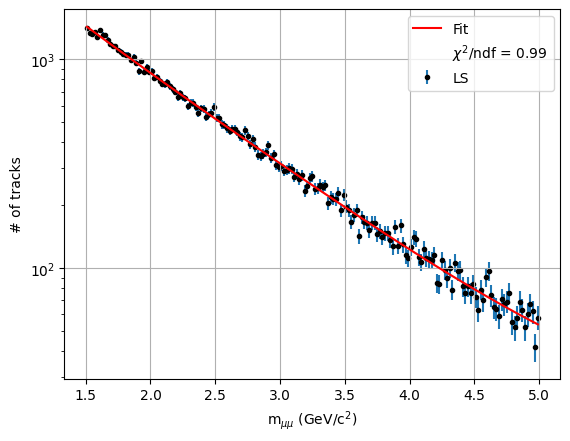

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

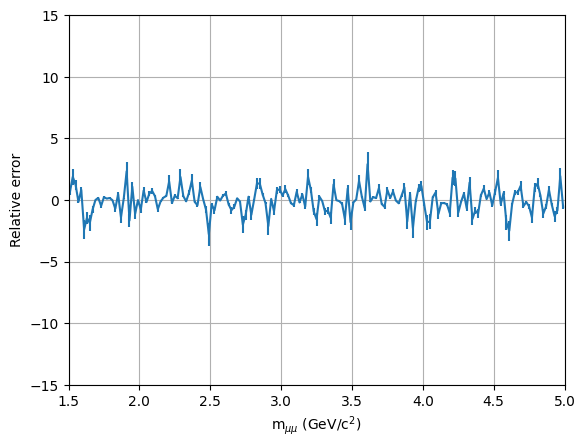

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

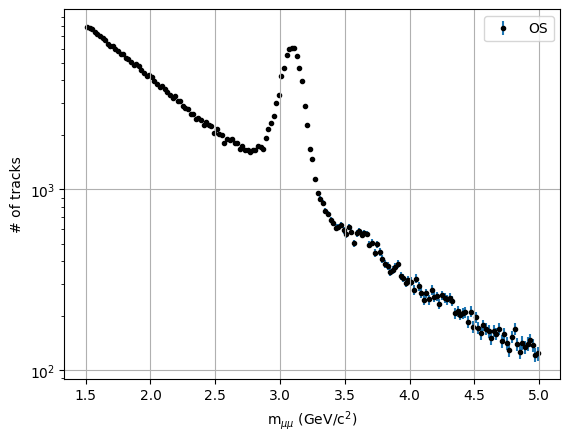

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [5388.700018460865, 3.0915830997262903, 0.07233756987706455, 95.22342617122243, 3.6547740847327, 0.07481519284763244, 9.006700214726672, 7.622953365506087, 6.368450092478799, 5.957491644764636, 4.804606165248175]
pcov: 
 [[ 2.70512819e+03  5.14158747e-03 -2.20934293e-02  1.39655762e+01
  -1.77819471e-02  3.44590221e-02 -1.30848135e-02 -9.77807198e-03
  -4.83532157e-02 -3.13232414e-02 -1.95990750e-02]
 [ 5.14158747e-03  5.14566514e-07 -1.76808359e-07 -3.11649248e-04
   4.45229038e-07 -8.45543429e-07  1.58115665e-07  7.59747223e-07
   1.53447815e-06  7.62974800e-07  1.25360260e-06]
 [-2.20934293e-02 -1.76808359e-07  6.14883822e-07  1.53710841e-03
  -8.73292880e-07  2.06019807e-06 -8.83646564e-07 -2.00290854e-06
  -5.41429654e-06 -3.39754230e-06 -2.34915767e-06]
 [ 1.39655762e+01 -3.11649248e-04  1.53710841e-03  2.87656603e+02
   1.27805332e-02 -1.29127240e-01 -1.04292790e-02 -1.21085918e-02
  -6.01363465e-02 -5.77943865e-02  3.89326516e-02]
 [-1.77819471e-02  4.45229038e-07 -8.73

fit error : 54.70637775866301


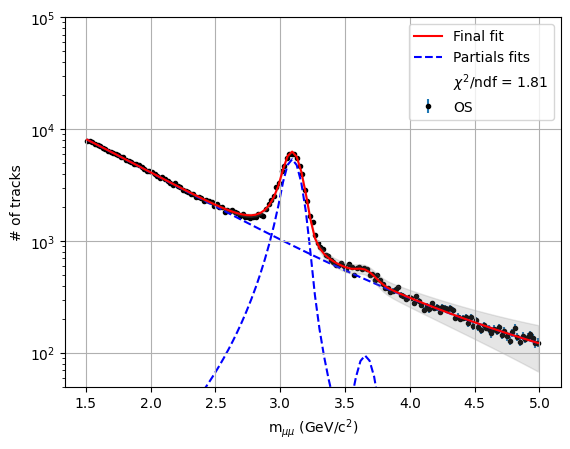

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

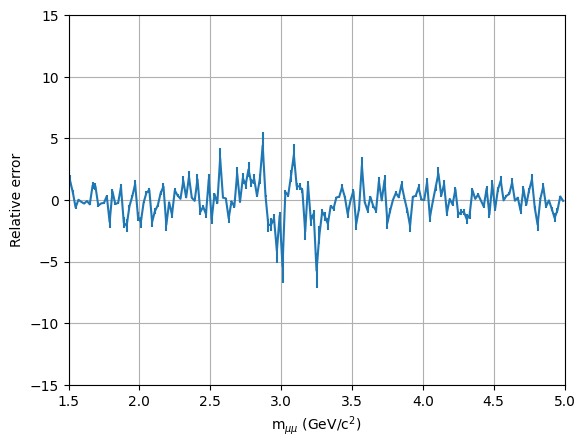

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  58051.1298347422  +/-  924.5434743856963 (stat.)
